<a href="https://colab.research.google.com/github/josefinasolisb/project2/blob/main/Project2_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#EDA

-eliminado las columnas innecesarias

-eliminado las filas duplicadas

-identificado y abordado los valores faltantes

-identificado y corregido las inconsistencias en los datos para los valores categóricos (es decir, Cat, cat, cats)

-producido visuales univariantes para el objetivo y todas las características

-identificado los valores atípicos

-producido un mapa de calor de correlación e identificado cualquier correlaciones moderadas o fuertes entre el objetivo y las características y/o entre una característica y otra

-comentado todos los pasos de limpieza y descrito todas las decisiones que tomaron.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coding Dojo/Project_2/secondary_data.csv',delimiter=';')
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [5]:
df.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

La variable objetivo es 'class', para clasificar si los hongos son comestibles o venenosos. Donde 'p' = 1 = venenoso y 'e' = 0 = comestible.

In [19]:
df['class'] = df['class'].map({'p': 1, 'e': 0})

<ipython-input-32-d755daabbebe>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=ax, palette='Blues')
<ipython-input-32-d755daabbebe>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=ax, palette='Blues')
<ipython-input-32-d755daabbebe>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=ax, palette='Blues')
<ipython-input-32-d755daabbebe>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` a

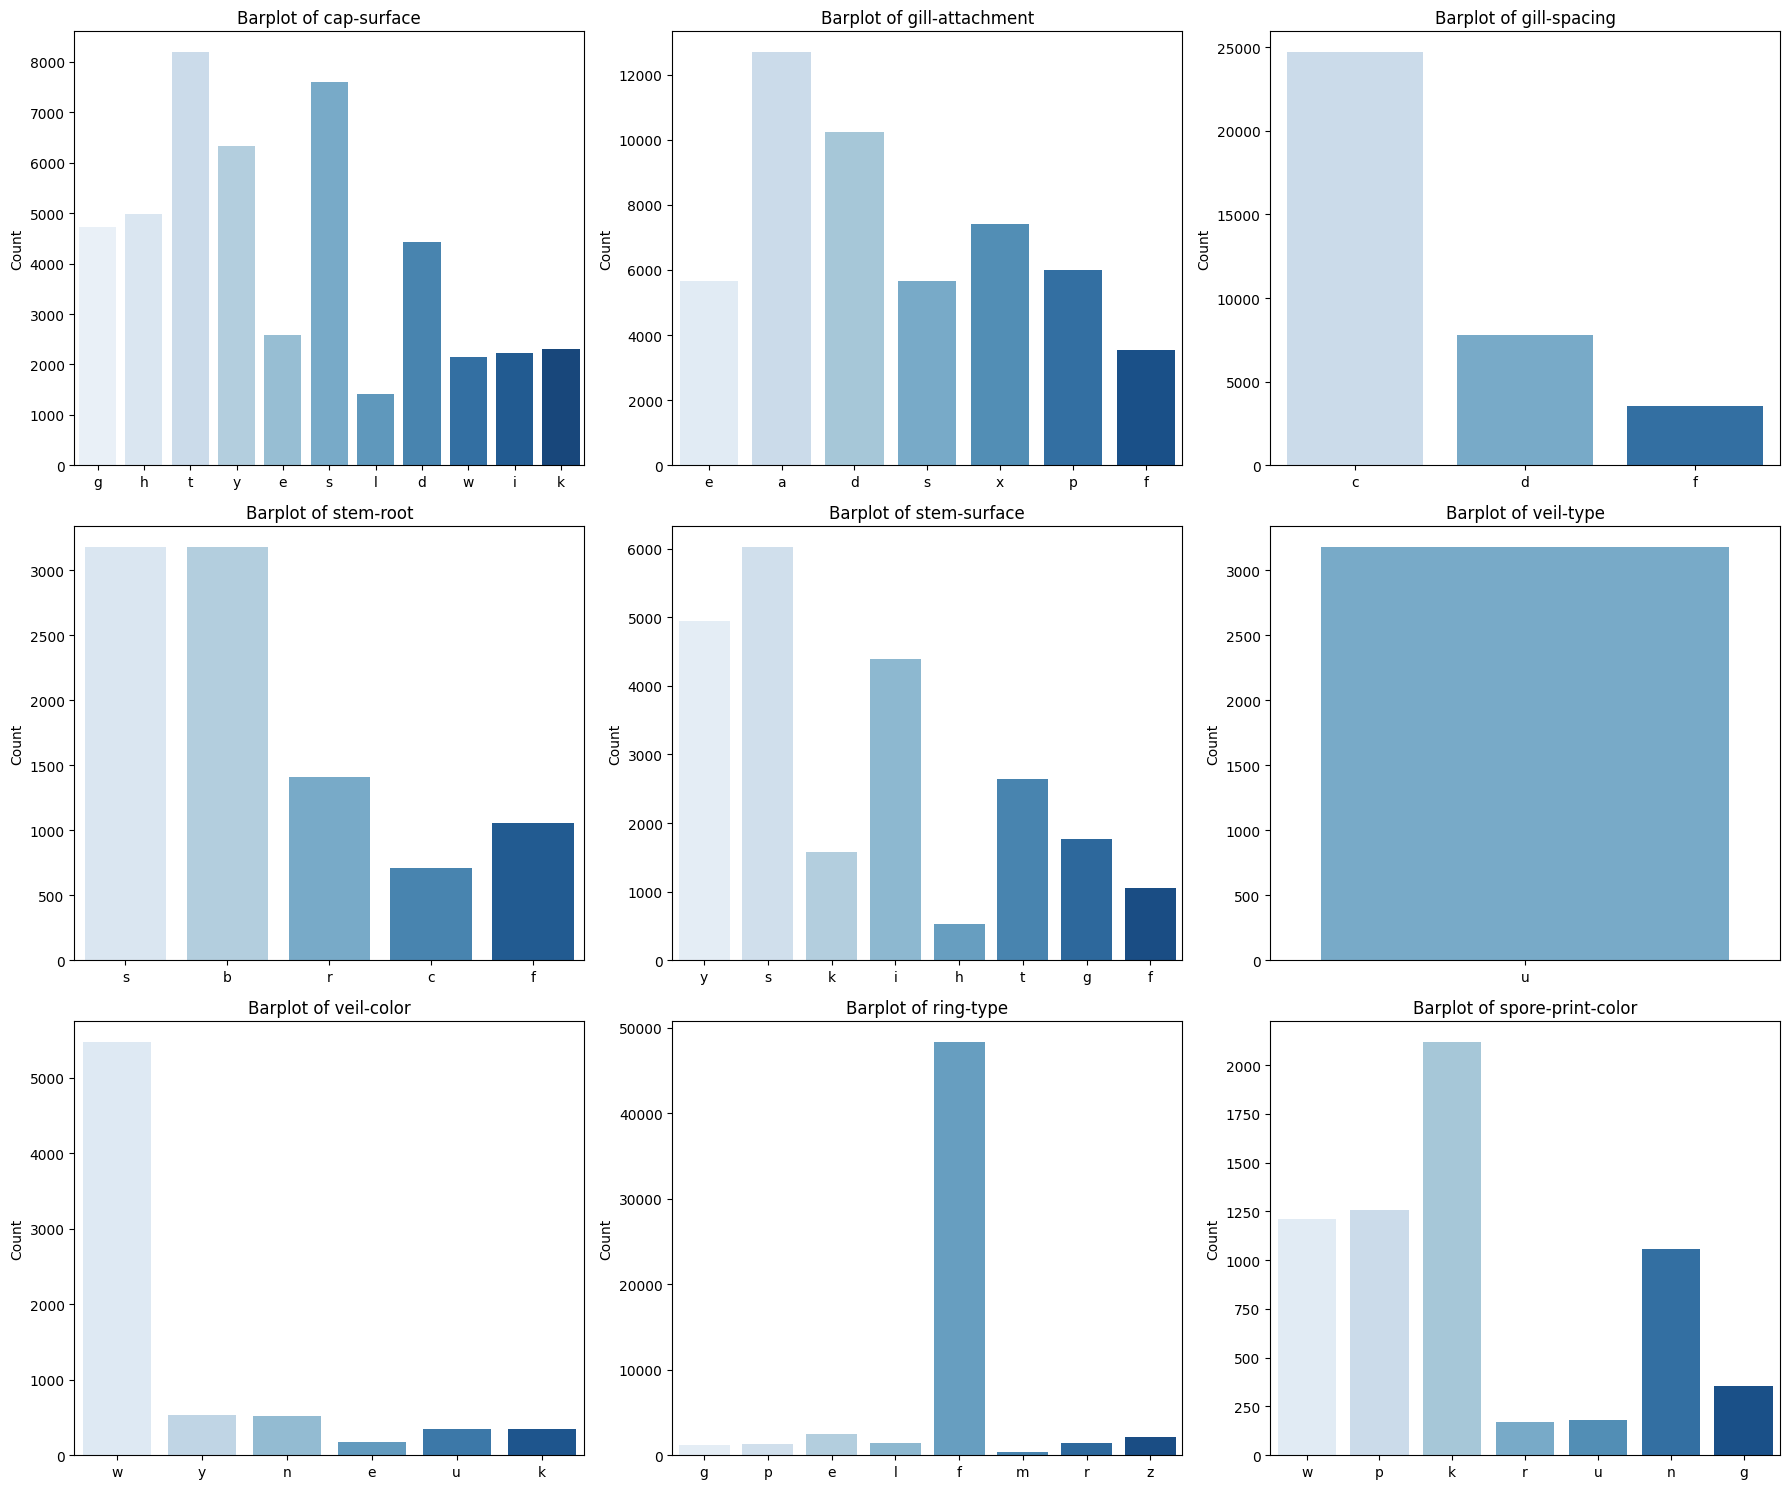

In [32]:
# Crear una cuadrícula de 3x3 para los gráficos de las columnas con valores faltantes
fig, axes = plt.subplots(3, 3, figsize=(18, 15))


# Lista de columnas categóricas
categorical_columns = ['cap-surface', 'gill-attachment', 'gill-spacing', 'stem-root', 'stem-surface', 'veil-type', 'veil-color', 'ring-type', 'spore-print-color']


# Crear los gráficos
for col, ax in zip(categorical_columns, axes.flatten()):
    sns.countplot(x=col, data=df, ax=ax, palette='Blues')
    ax.set_title(f'Barplot of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

En la mayoria de graficos se ve que la dispdispersion de los datos esta acumulada en una sola variable, esto es muy probable por que se trata de columnas con datos faltantes. Especificamente en veil-type hay que tener consideracion con la imputacion de datos porque el grafica muestra una sola variable. Se debe investigar y conversar con expertos sobre como abordar este tipo de valor, teniendo en consideracion que la imputacion de datos siempre introduce un cierto porcentaje de error.

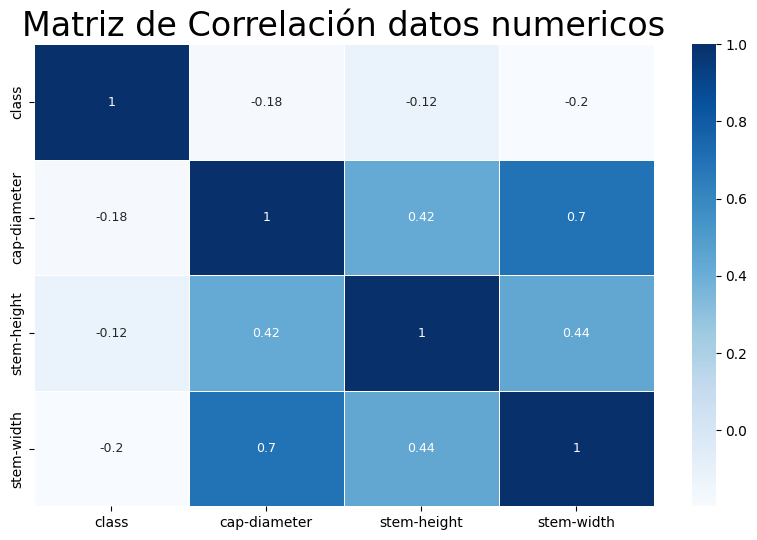

In [20]:
numeric_vars = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_vars.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=0.5, annot_kws={"fontsize":9})
plt.title('Matriz de Correlación datos numericos', fontsize=24)
plt.show()

Segun el mapa de correlacion, existe una correlacion semi alta entre 'cap-diameter' y 'stem-width' con un valor de 0.7.

In [21]:
def unique_values(df):
    sorted_unique_values = {}
    for column_name in df.columns:
        if pd.api.types.is_numeric_dtype(df[column_name]):
            sorted_values = sorted(df[column_name].dropna().unique())
        else:
            sorted_values = sorted(df[column_name].astype(str).unique())
        sorted_unique_values[column_name] = sorted_values
    return sorted_unique_values

#Imprimir los valores unicos por columna
unique_values_dict = unique_values(df)
for column, values in unique_values_dict.items():
    print(f"{column}: {values}")

class: [0, 1]
cap-diameter: [0.38, 0.44, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6, 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7, 1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8, 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9, 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.0, 2.01, 2.02, 2.03, 2.04, 2.05, 2.06, 2.07, 2.08, 2.0

Wagner,Dennis, Heider,D., and Hattab,Georges. (2023). Secondary Mushroom. UCI Machine Learning Repository. https://doi.org/10.24432/C5FP5Q.



Una de los metodos deimputacion de datos mas rapido y sencillo para variables categoricas es la estrategia most frequent. Sin embargo se debe considerar lo mencionado anteriormente en el analisis de barplots.

In [22]:
freq_imputer = SimpleImputer(strategy='most_frequent')
cat_selector = make_column_selector(dtype_include='object')